# Linear Regression Demo

In [1]:
# Import dependencies.
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Import custom linear regression implementation.
from linear_regression import LinearRegression

In [2]:
# Load the data.
pd_data = pd.read_csv('../../data/world-happiness-report-2017.csv')

# Print first several records to see how the data looks.
pd_data.head()

,Country,Happiness.Rank,Happiness.Score,Whisker.high,Whisker.low,Economy..GDP.per.Capita.,Family,Health..Life.Expectancy.,Freedom,Generosity,Trust..Government.Corruption.,Dystopia.Residual
0,Norway,1,7.537,7.594445,7.479556,1.616463,1.533524,0.796667,0.635423,0.362012,0.315964,2.277027
1,Denmark,2,7.522,7.581728,7.462272,1.482383,1.551122,0.792566,0.626007,0.355280,0.400770,2.313707
2,Iceland,3,7.504,7.622030,7.385970,1.480633,1.610574,0.833552,0.627163,0.475540,0.153527,2.322715
3,Switzerland,4,7.494,7.561772,7.426227,1.564980,1.516912,0.858131,0.620071,0.290549,0.367007,2.276716
4,Finland,5,7.469,7.527542,7.410458,1.443572,1.540247,0.809158,0.617951,0.245483,0.382612,2.430182


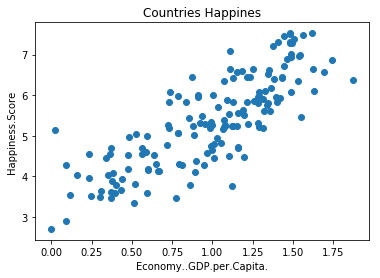

In [8]:
# Split training set input and output.
x = pd_data['Economy..GDP.per.Capita.'].values
y = pd_data['Happiness.Score'].values

# Plot the data.
plt.scatter(x, y)
plt.xlabel('Economy..GDP.per.Capita.')
plt.ylabel('Happiness.Score')
plt.title('Countries Happines')
plt.show()

In [4]:
# Reshape the data to fit LinearRegression requirements.
m = y.size
x = x.reshape(m, 1)
y = y.reshape(m, 1)

# Init linear regression.
linear_regression = LinearRegression(x, y)

# Set up linear regression parameters.
num_iterations = 50  # Number of gradient descent iterations.
regularization_param = 0  # Helps to fight model overfitting.
learning_rate = 0.1  # The size of the gradient descent step.

# Train linear regression.
(
    theta,
    features_mean,
    features_deviation,
    training_set_normalized,
    cost_history
) = linear_regression.train(learning_rate, regularization_param, num_iterations)

In [5]:
print('Initial cost: {0}'.format(cost_history[0]))
print('Optimized cost: {0}'.format(cost_history[-1]))
print('Theta: {0}'.format(theta.reshape(1, 2)[0]))

Initial cost: 285114.3626738258
Optimized cost: 5465.526193072765
Theta: [5.32642594 1.06469476]


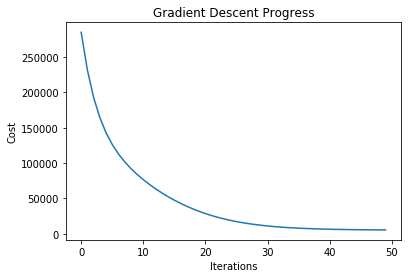

In [7]:
# Plot gradient descent progress.
plt.plot(range(num_iterations), cost_history)
plt.xlabel('Iterations')
plt.ylabel('Cost')
plt.title('Gradient Descent Progress')
plt.show()